# Finding Feature Interactions

- using SHAP, currently not working. can't find equivalent of get_feature_interactions method (which is available for TreeExplainer for tree-based models) for logistic regression. LinearExplainer, Explainer, KernelExplainer are suitable for LR, but not sure how to get the feats interactions.

In [1]:
import sys
sys.path.append('/Users/q616967/Library/Python/3.10/lib/python/site-packages')

In [20]:
!{sys.executable} -m pip install numpy==1.23.5 # a dependency of shap needs numpy below 1.24, restart kernel after install

  Using cached numpy-1.23.5-cp310-cp310-macosx_11_0_arm64.whl (13.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.0
    Uninstalling numpy-1.25.0:
      Successfully uninstalled numpy-1.25.0


In [2]:
import os
import pandas as pd
import numpy as np

In [3]:
np.__version__

'1.23.5'

In [4]:
PROJECT_DIR = "/Users/q616967/Workspace/thesis/uni/xai-thesis/"
SAMPLE_DATA_DIR = os.path.join(PROJECT_DIR, "classification/sample_data/")

'''Load data: 700 instances in total, with only 20 features'''
data = pd.read_csv(os.path.join(SAMPLE_DATA_DIR, "data_kbest.csv"), index_col=0)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['outcome']), data['outcome'], test_size=0.2, random_state=42)

In [6]:
type(X_train), type(y_train), X_train.shape, y_train.shape

(pandas.core.frame.DataFrame, pandas.core.series.Series, (560, 20), (560,))

In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=1, max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [15]:
import shap

explainer = shap.LinearExplainer(model=model, masker=X_train, output_names=['False', 'True'])

In [17]:
shap_values = explainer.shap_values(X_train)

In [19]:
shap_values.shape

(560, 20)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


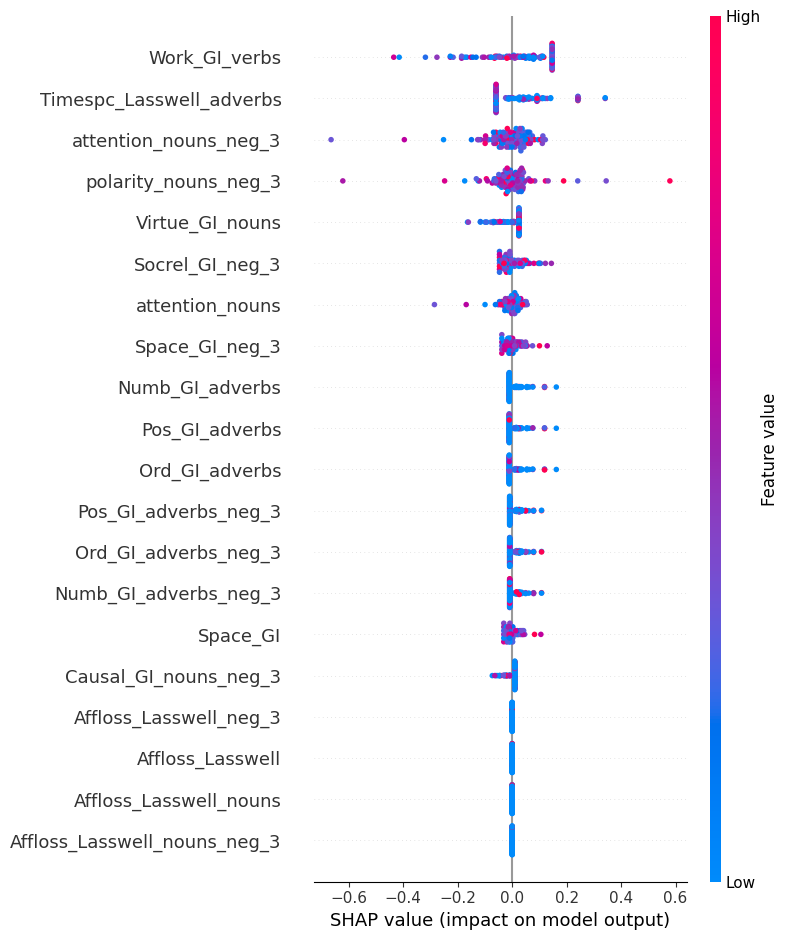

In [21]:
shap.summary_plot(shap_values[:100], X_test[:100])